In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load dataset (replace with your dataset path)
df = pd.read_csv(r'C:\Users\nadee\ML Internship Project\CUSTOMER CHURN Data Set\Churn_Modelling.csv')

In [18]:
# Preview the dataset
print(df.head())
print(df.info())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [19]:
# Drop columns that are not useful for prediction (e.g., RowNumber, CustomerId, Surname)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [20]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values if any (for this dataset, there might not be any missing values)


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [21]:
# Identify numerical and categorical columns
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

In [22]:
# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [29]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))  # We need to use dense output for further processing
])

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [31]:
# Separate features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Preprocess data
X = preprocessor.fit_transform(X)

C:\Users\nadee\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

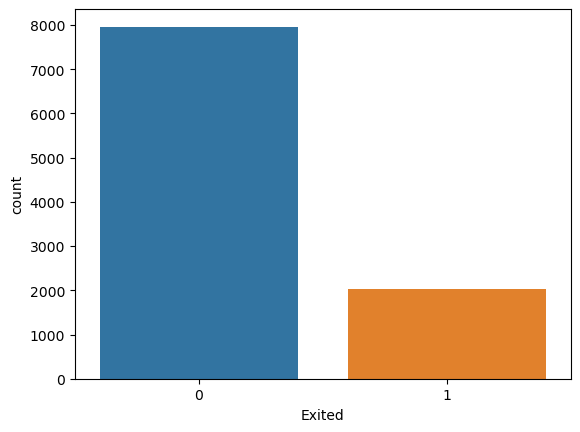

In [40]:
# Example: Visualizing the distribution of the target variable
sns.countplot(x='Exited', data=df)
plt.show()

In [42]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Now, all columns should be numeric
print(df_encoded.head())


   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        Fals

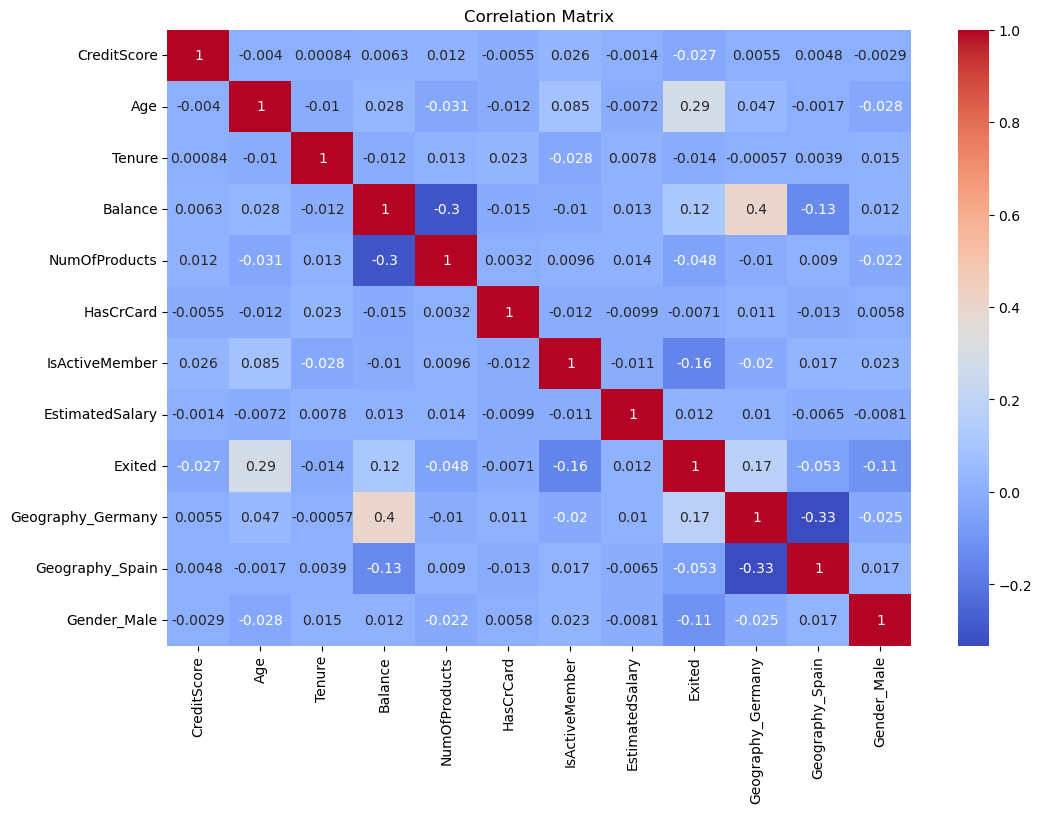

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [33]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [35]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.77      0.48      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



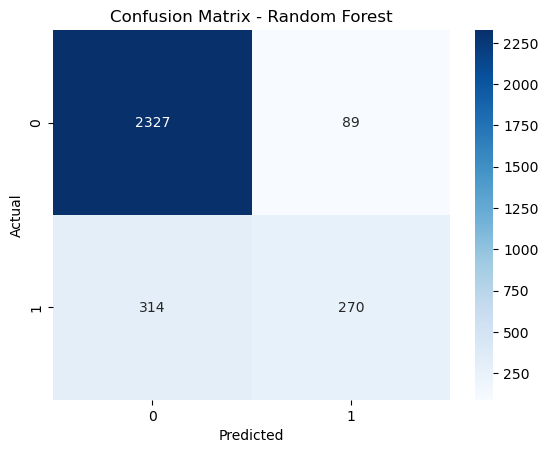

ROC-AUC Score (Gradient Boosting): 0.87


In [36]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score for Gradient Boosting
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_gb)
print(f"ROC-AUC Score (Gradient Boosting): {roc_auc:.2f}")


In [37]:
# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)

# Evaluate the tuned model
y_pred_rf_tuned = grid_search_rf.predict(X_test)
print("Tuned Random Forest:")
print(classification_report(y_test, y_pred_rf_tuned))


Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000



In [38]:
import joblib

# Save the best model (e.g., the tuned Random Forest)
joblib.dump(grid_search_rf.best_estimator_, 'churn_model.pkl')


['churn_model.pkl']

In [39]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('churn_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get data from POST request
    prediction = model.predict([data['features']])
    return jsonify({'churn': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\nadee\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
